<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Train-Test Split and Cross-Validation Lab

_Authors: Joseph Nelson (DC), Kiefer Katovich (SF)_

---

## Review of Train/Test Validation Methods

We've discussed overfitting, underfitting, and how to validate the "generalizeability" of your models by testing them on unseen data. 

In this lab you'll practice two related validation methods: 
1. **train/test split**
2. **k-fold cross-validation**

Train/test split and k-fold cross-validation both serve two useful purposes:
- We prevent overfitting by not using all the data, and
- We retain some remaining data to evaluate our model.

In the case of cross-validation, the model fitting and evaluation is performed multiple times on different train/test splits of the data.

Ultimately we can use the training/test validation framework to compare multiple models on the same dataset. This could be comparisons of two linear models, or of completely different models on the same data.


## Instructions

For your independent practice, fit **three different models** on the Boston Housing Data. For example, you could pick three different subsets of variables, one or more polynomial models, or any other model that you like. 

**Start with train/test split validation:**
* Fix a testing/training split of the data.
* Train each of your models on the training data.
* Evaluate each of the models on the testing data.
* Rank the models by how well they score on the testing data set.

**Then try k-fold cross-validation:**
* Perform a k-fold cross-validation and use the cross-validation scores to compare your models. Did this change your rankings?
* Try a few different k-splits of the data for the same models.

If you're interested, try a variety of response variables. We start with **MEDV** (the `.target` attribute from the data set load method).

In [1]:
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
boston = load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target
#Median Income


In [3]:
y = pd.DataFrame(boston.target, columns=['MEDV'])
X['MEDV'] = y
X.head()
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1) Clean up any data problems.

Fix any problems with the data, if applicable.

In [4]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


In [5]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 2) Select 3–4 variables with your data set on which to perform a 50-50 train/test split.

- Use scikit-learn.
- Score and plot your predictions.

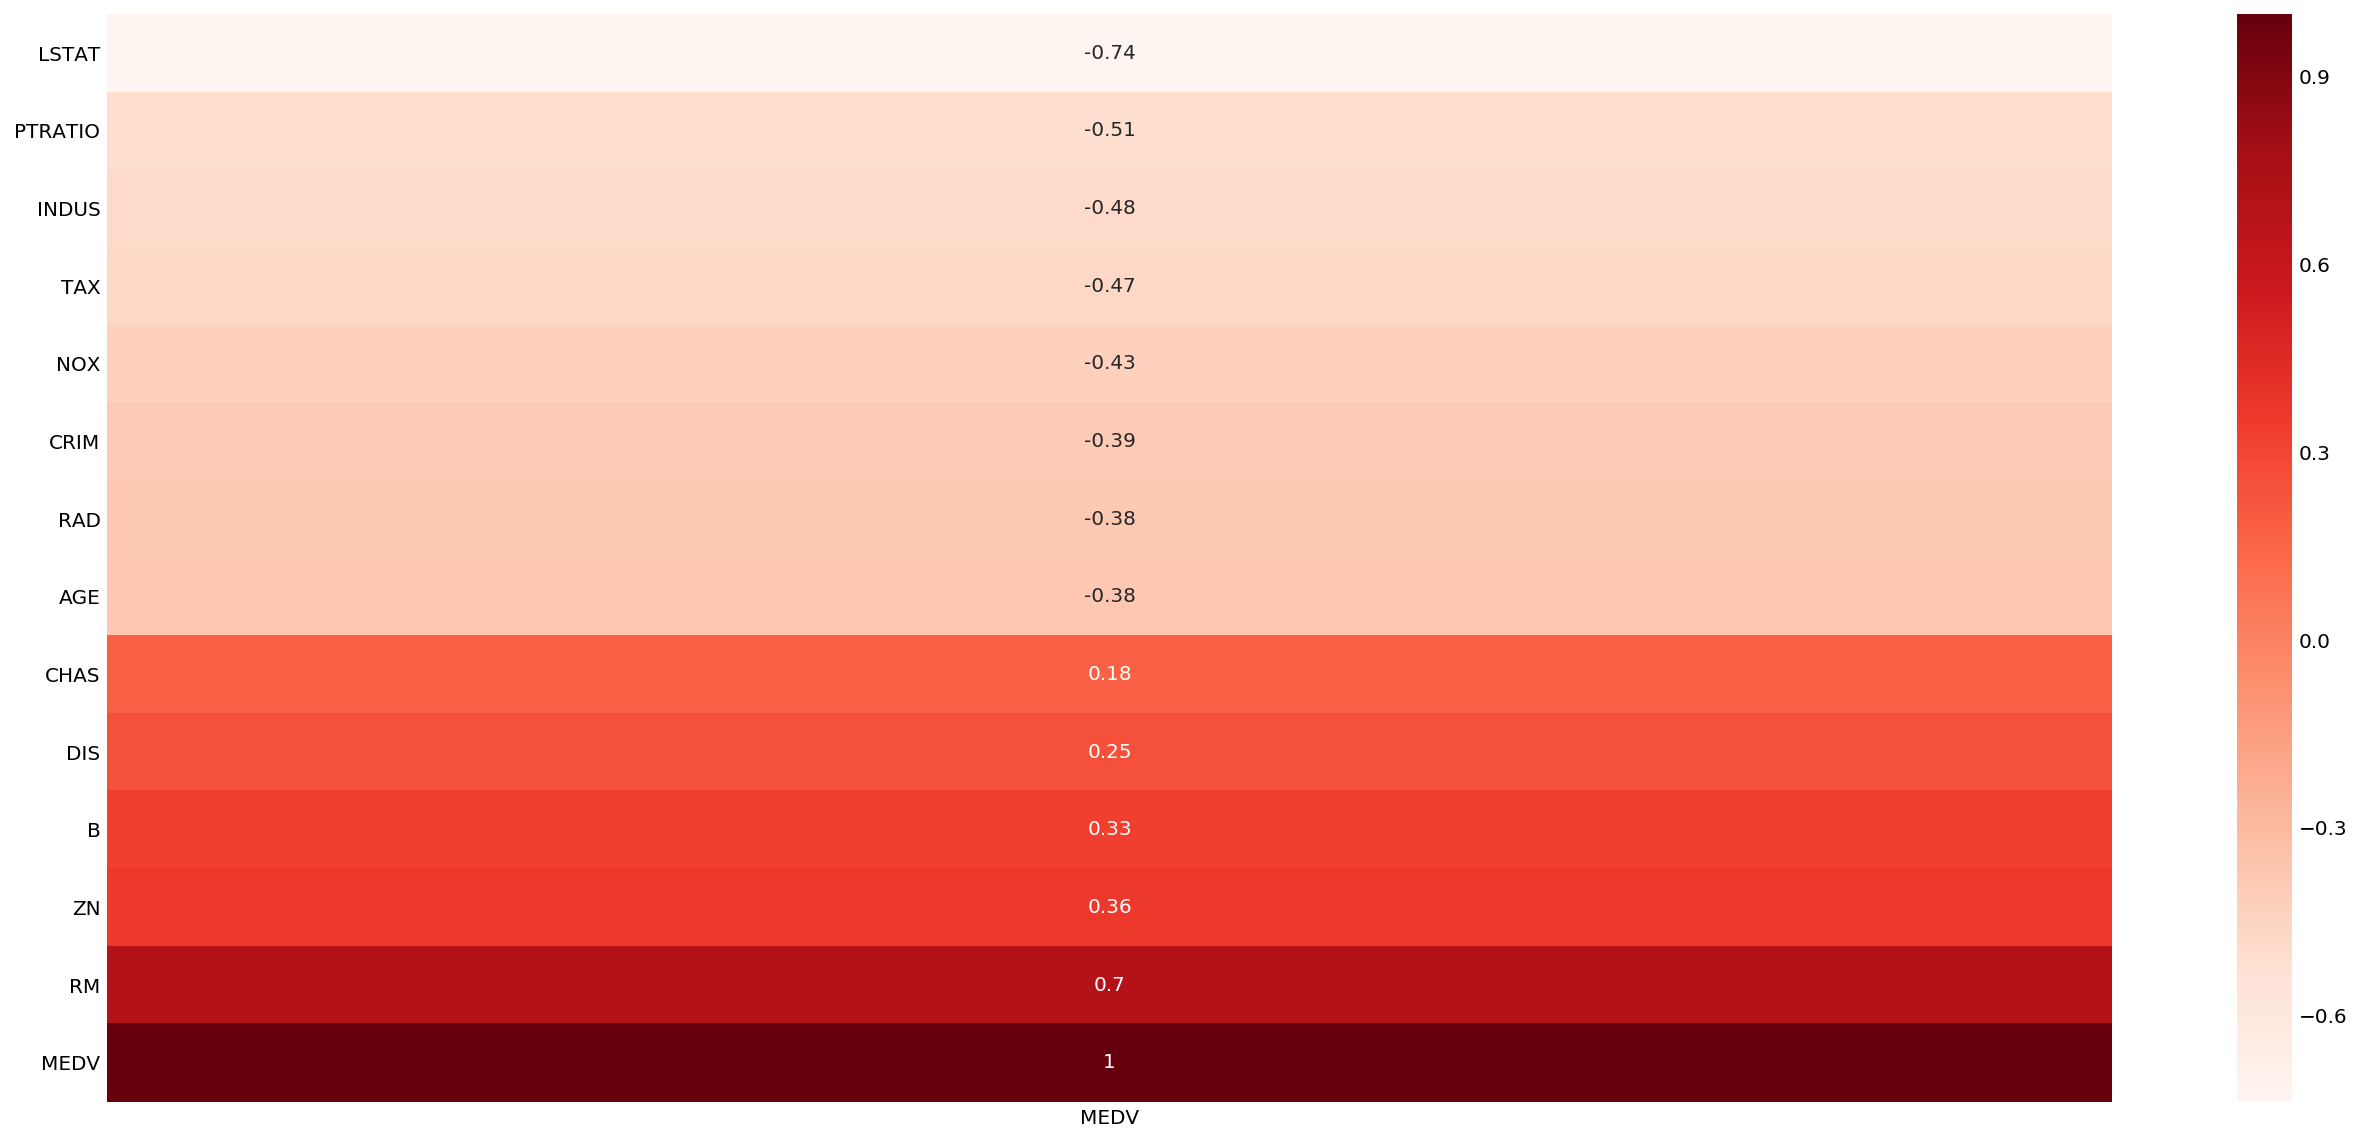

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(X.corr()[['MEDV']].sort_values('MEDV'), cmap='Reds', annot=True)
#Will Choose, RM, ZN, B 

In [7]:
X.drop(columns=['MEDV'], inplace=True)
#Need to remove the column for testing. 

0.515450344639339

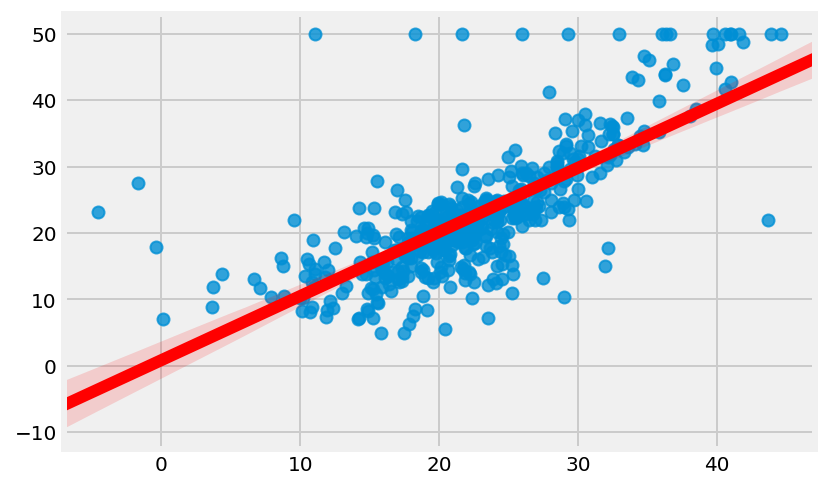

In [8]:
features =['RM', 'ZN', 'B']
X = X[features]
y = boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=.5)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred50= lr.predict(X)
sns.regplot(pred50, y, line_kws={'color':'red'})
lr.score(X_test, y_test)

### 3) Try 70-30 and 90-10.

- Score and plot.  
- How do your metrics change?

0.5536402131547917

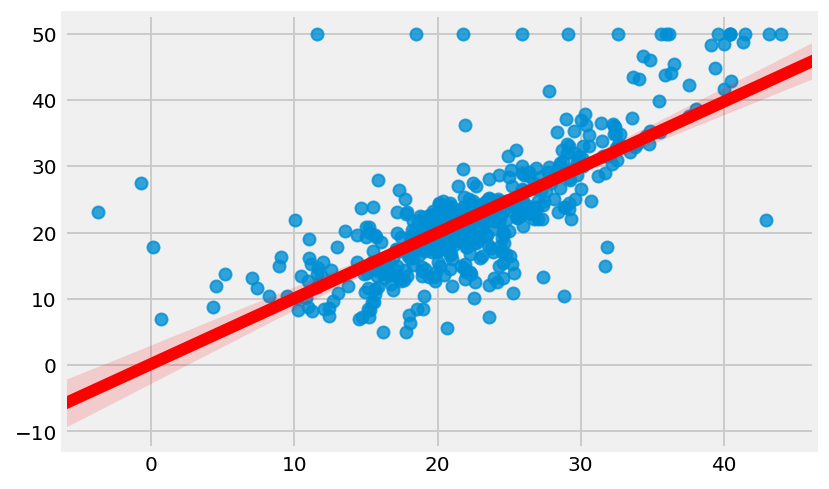

In [9]:
features =['RM', 'ZN', 'B']
X = X[features]
y= boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=.7)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred70 = lr.predict(X)
sns.regplot(pred70, y, line_kws={'color':'red'})
lr.score(X_test, y_test)

0.6712801445694785

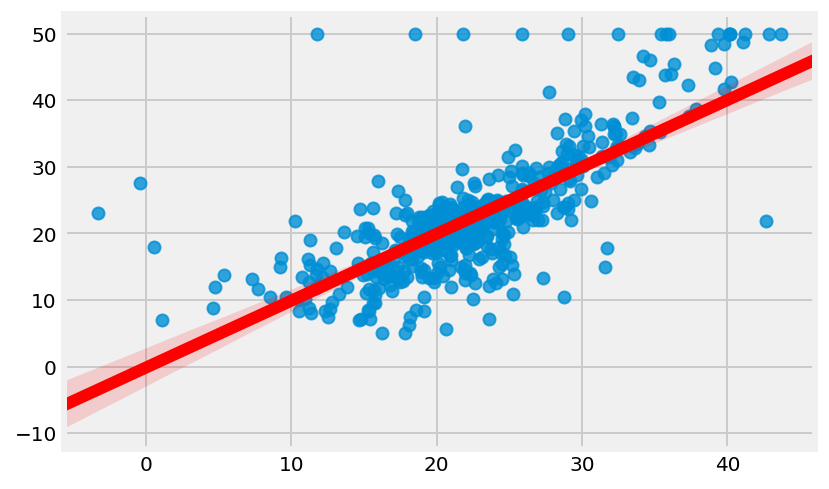

In [10]:
features =['RM', 'ZN', 'B']
X = X[features]
y= boston.target
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, train_size=.9)
lr = LinearRegression()
lr.fit(X_train, y_train)
pred90 = lr.predict(X)
sns.regplot(pred90, y, line_kws={'color':'red'})
lr.score(X_test, y_test)

## Scores increase agianst test with the larger ammount of training data

### 4) Try k-folds cross-validation with k between 5–10 for your regression. 

- What seems optimal? 
- How do your scores change?  
- What is the variance of scores like?
- Try out different folds to get a sense of how this impacts your score.

In [11]:
plotit = pd.DataFrame(columns = ['kval', 'score'])
plotit['kval'] = [5,6,7,8,9,10]
for k in range(5, 11):
    cvs = cross_val_score(lr, X_train, y_train, cv=k ).mean()
    ind = (k - 5)
    plotit.iloc[ind, 1] = cvs

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

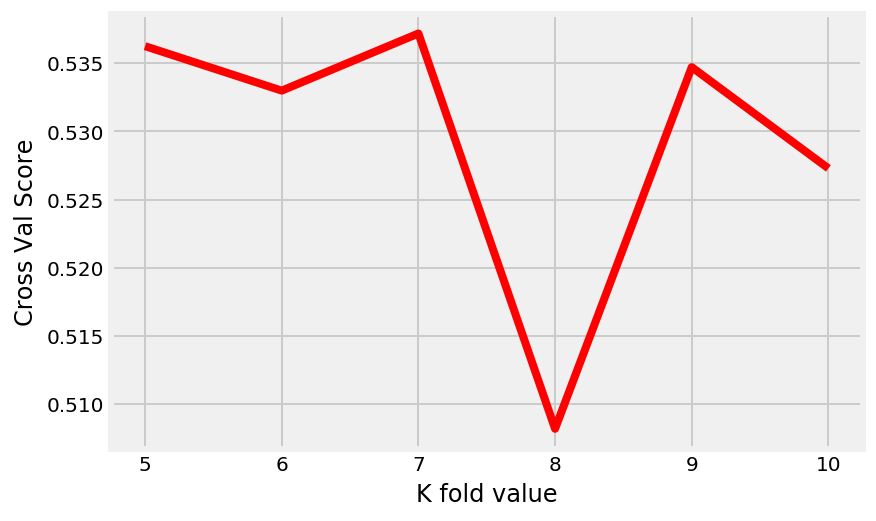

In [17]:
plt.xlabel('K fold value')
plt.ylabel('Cross Val Score')
plt.plot(plotit['kval'], plotit['score'], c='r');
plt.tight_layout

In [13]:
plotit
#K value at 7 seems to give us the best number of folds. 

,kval,score
0,5,0.536248
1,6,0.532987
2,7,0.537178
3,8,0.508182
4,9,0.534711
5,10,0.527283


### 5) [Bonus] Optimize the $R^2$ score.

Can you optimize your R^2 by selecting the best features and validating the model using either train/test split or k-folds?

Your code will need to iterate through the different combinations of predictors, cross-validate the current model parameterization, and determine which set of features performed best.

The number of k-folds is up to you.

> *Hint:* The `itertools` package is useful for combinations and permutations.

### 5.1) Explain what could be wrong with this approach.

In [15]:
# A: It puts too heavy emphasis on one metric to minimize THAT score. Whereas the model needs to be analyzed from a holistic view.

### 6) [Bonus] Explore another target variable and practice Patsy formulas.

Can you find another response variable, given a combination of predictors, that can be predicted accurately through the exploration of different predictors in this data set?

**Try using Patsy to construct your target and predictor matrices from formula strings.**

> *Tip: Check out pairplots, coefficients, and Pearson scores.*

In [16]:
import patsy

# A: